# Additional code

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

## Import Tariff Dataset & Obtain Low/High Tariffs

In [3]:
#Import dataset
tariff = pd.read_excel('./archive/Tariffs.xlsx', sheet_name=0)

In [4]:
tariff

,TariffDateTime,Tariff
0,2013-01-01 00:00:00,Normal
1,2013-01-01 00:30:00,Normal
2,2013-01-01 01:00:00,Normal
3,2013-01-01 01:30:00,Normal
4,2013-01-01 02:00:00,Normal
...,...,...
17515,2013-12-31 21:30:00,Normal
17516,2013-12-31 22:00:00,Normal
17517,2013-12-31 22:30:00,Normal
17518,2013-12-31 23:00:00,Normal


In [5]:
tariff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TariffDateTime  17520 non-null  datetime64[ns]
 1   Tariff          17520 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 273.9+ KB


In [6]:
tariff.Tariff.value_counts()

Normal    15072
Low        1660
High        788
Name: Tariff, dtype: int64

In [7]:
def tariff_clean(keyword):
    df_split = tariff[tariff.Tariff == keyword].reset_index()
    df_split['Hour'] = df_split['TariffDateTime'].dt.hour
    df_split['Date'] = df_split['TariffDateTime'].dt.date
    df_split['Month'] = df_split['TariffDateTime'].dt.month
    df_split['Day'] = df_split['TariffDateTime'].dt.day
    df_split = df_split.drop(columns='index')
    return df_split

#Unused: .dt.strftime('%H:%M')

In [8]:
tariff_low = tariff_clean('Low')
tariff_low.to_csv('tariff_low.csv') 
tariff_low

,TariffDateTime,Tariff,Hour,Date,Month,Day
0,2013-01-04 14:00:00,Low,14,2013-01-04,1,4
1,2013-01-04 14:30:00,Low,14,2013-01-04,1,4
2,2013-01-04 15:00:00,Low,15,2013-01-04,1,4
3,2013-01-04 15:30:00,Low,15,2013-01-04,1,4
4,2013-01-04 16:00:00,Low,16,2013-01-04,1,4
...,...,...,...,...,...,...
1655,2013-12-28 02:30:00,Low,2,2013-12-28,12,28
1656,2013-12-28 03:00:00,Low,3,2013-12-28,12,28
1657,2013-12-28 03:30:00,Low,3,2013-12-28,12,28
1658,2013-12-28 04:00:00,Low,4,2013-12-28,12,28


In [9]:
tariff_high = tariff_clean('High')
tariff_high.to_csv('tariff_high.csv') 
tariff_high

,TariffDateTime,Tariff,Hour,Date,Month,Day
0,2013-01-07 23:00:00,High,23,2013-01-07,1,7
1,2013-01-07 23:30:00,High,23,2013-01-07,1,7
2,2013-01-08 00:00:00,High,0,2013-01-08,1,8
3,2013-01-08 00:30:00,High,0,2013-01-08,1,8
4,2013-01-08 01:00:00,High,1,2013-01-08,1,8
...,...,...,...,...,...,...
783,2013-12-29 02:30:00,High,2,2013-12-29,12,29
784,2013-12-29 03:00:00,High,3,2013-12-29,12,29
785,2013-12-29 03:30:00,High,3,2013-12-29,12,29
786,2013-12-29 04:00:00,High,4,2013-12-29,12,29


## Analyse Patterns of Low/High Price Signals Over Time of Day

In [10]:
#Import dataset
tariff_low = pd.read_csv('./tariff_low.csv').drop(columns=['Unnamed: 0'])
tariff_high = pd.read_csv('./tariff_high.csv').drop(columns=['Unnamed: 0'])
tariff_combined = tariff_low.append(tariff_high)
tariff_combined

,TariffDateTime,Tariff,Hour,Date,Month,Day
0,2013-01-04 14:00:00,Low,14,2013-01-04,1,4
1,2013-01-04 14:30:00,Low,14,2013-01-04,1,4
2,2013-01-04 15:00:00,Low,15,2013-01-04,1,4
3,2013-01-04 15:30:00,Low,15,2013-01-04,1,4
4,2013-01-04 16:00:00,Low,16,2013-01-04,1,4
...,...,...,...,...,...,...
783,2013-12-29 02:30:00,High,2,2013-12-29,12,29
784,2013-12-29 03:00:00,High,3,2013-12-29,12,29
785,2013-12-29 03:30:00,High,3,2013-12-29,12,29
786,2013-12-29 04:00:00,High,4,2013-12-29,12,29


In [11]:
def plot_price_signal_prop_graph(attr):
    tariff_agg = tariff_combined.groupby(['Tariff', attr]).TariffDateTime.count().reset_index().rename(columns={'TariffDateTime': 'Count'})
    print(tariff_agg)
    
    tariff_agg_crosstab_prop = pd.crosstab(index=tariff_agg[attr],
                                            columns=tariff_agg['Tariff'],
                                            values=tariff_agg['Count'],
                                            aggfunc='sum',
                                            normalize='index')
    print(tariff_agg_crosstab_prop)

    
    ax = tariff_agg_crosstab_prop.plot(kind='bar', stacked=True, figsize=(12,5))

    if attr == 'Hour':
        x_ticks = [0,2,4,6,8,10,12,14,16,18,20,22]
        x_tick_labels = ['00:00', '02:00', '04:00', '06:00', '08:00', '10:00',
                         '12:00', '14:00', '16:00', '18:00', '20:00', '22:00']
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_tick_labels)
        
    plt.xticks(rotation=0)
    plt.legend(loc='upper right', ncol=2)
    plt.xlabel(attr)
    plt.ylabel('Proportion')
    plt.title('Occurence of High/Low Price Signals for dToU Plan Over ' + attr)
    plt.savefig('./extra/energy_signal_prop_' + attr + '.png', facecolor='w', bbox_inches='tight')  
    plt.show()

   Tariff  Hour  Count
0    High     0     18
1    High     1     18
2    High     2     18
3    High     3     18
4    High     4     18
5    High     5     18
6    High     6     18
7    High     7     22
8    High     8     22
9    High     9     22
10   High    10     20
11   High    11     26
12   High    12     26
13   High    13     26
14   High    14     24
15   High    15     24
16   High    16     24
17   High    17     68
18   High    18     68
19   High    19     68
20   High    20     68
21   High    21     68
22   High    22     68
23   High    23     18
24    Low     0     78
25    Low     1     78
26    Low     2     78
27    Low     3     78
28    Low     4     78
29    Low     5     78
30    Low     6     78
31    Low     7     74
32    Low     8     74
33    Low     9     74
34    Low    10     76
35    Low    11     82
36    Low    12     82
37    Low    13     82
38    Low    14     84
39    Low    15     84
40    Low    16     84
41    Low    17     40
42    Low  

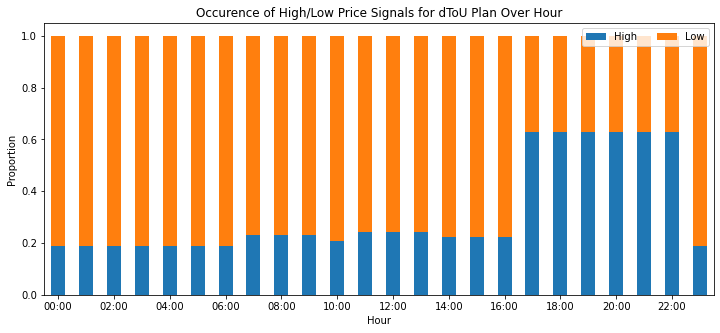

In [12]:
plot_price_signal_prop_graph('Hour')

## Analyse Patterns of Low/High Price Signals Over Month

   Tariff  Month  Count
0    High      1     60
1    High      2     98
2    High      3     72
3    High      4     42
4    High      5     72
5    High      6    120
6    High      7     36
7    High      8     12
8    High      9     48
9    High     10     66
10   High     11     60
11   High     12    102
12    Low      1    162
13    Low      2    178
14    Low      3    246
15    Low      4     66
16    Low      5    144
17    Low      6    102
18    Low      7     90
19    Low      8     54
20    Low      9     36
21    Low     10    114
22    Low     11    162
23    Low     12    306
Tariff      High       Low
Month                     
1       0.270270  0.729730
2       0.355072  0.644928
3       0.226415  0.773585
4       0.388889  0.611111
5       0.333333  0.666667
6       0.540541  0.459459
7       0.285714  0.714286
8       0.181818  0.818182
9       0.571429  0.428571
10      0.366667  0.633333
11      0.270270  0.729730
12      0.250000  0.750000


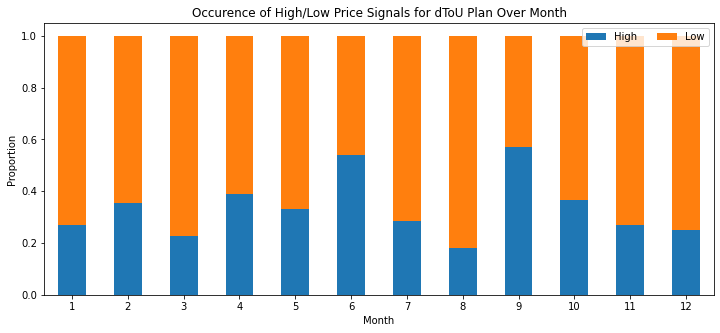

In [13]:
plot_price_signal_prop_graph('Month')

## Analyse Patterns of Low/High Price Signals Over Day

   Tariff  Day  Count
0    High    1     18
1    High    2     12
2    High    3     30
3    High    4     12
4    High    5      6
5    High    6     12
6    High    7     16
7    High    8     86
8    High    9      8
9    High   10     12
10   High   11     18
11   High   13     54
12   High   14     42
13   High   15     30
14   High   16     28
15   High   17     54
16   High   18     28
17   High   19     52
18   High   20     36
19   High   21     30
20   High   23     12
21   High   25      6
22   High   26     36
23   High   27     60
24   High   28     26
25   High   29     30
26   High   30     28
27   High   31      6
28    Low    1     34
29    Low    2     52
30    Low    3     62
31    Low    4     26
32    Low    5     42
33    Low    6     40
34    Low    7     58
35    Low    8     42
36    Low    9     46
37    Low   10     42
38    Low   11     16
39    Low   12     26
40    Low   13     42
41    Low   14     10
42    Low   15     50
43    Low   16     48
44    Low 

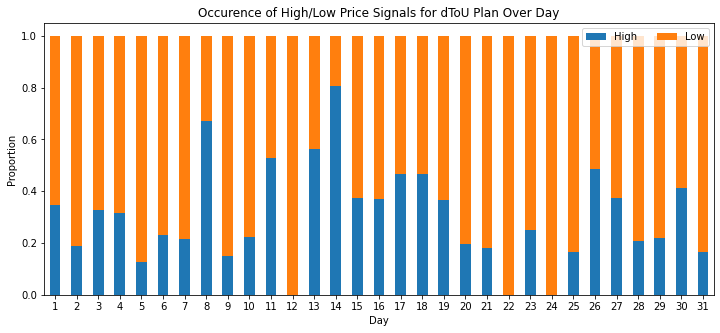

In [14]:
plot_price_signal_prop_graph('Day')

## Analyse Household Usage Behaviour when Low/High Price Signals

### Join Tables (For reference, will load saved dataset instead)

In [20]:
print(tariff_low.info())
print(tariff_high.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1660 entries, 0 to 1659
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TariffDateTime  1660 non-null   datetime64[ns]
 1   Tariff          1660 non-null   object        
 2   Hour            1660 non-null   int64         
 3   Date            1660 non-null   object        
 4   Month           1660 non-null   int64         
 5   Day             1660 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 77.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TariffDateTime  788 non-null    datetime64[ns]
 1   Tariff          788 non-null    object        
 2   Hour            788 non-null    int64         
 3   Date            788 non-null    ob

In [21]:
informations_households = pd.read_csv('./archive/informations_households.csv')

In [22]:
informations_households

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0
...,...,...,...,...,...
5561,MAC002056,Std,ACORN-U,ACORN-U,block_111
5562,MAC004587,Std,ACORN-U,ACORN-U,block_111
5563,MAC004828,Std,ACORN-U,ACORN-U,block_111
5564,MAC001704,ToU,ACORN-U,ACORN-U,block_111


In [ ]:
import glob

# get data file names
path =r'D:\data'
filenames = glob.glob(path + "/01-[0-9][0-9]-2021.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
jan_df = pd.concat(dfs, ignore_index=True)

In [30]:
hourly_df['tstp'] = pd.to_datetime(hourly_df['tstp'])

In [31]:
hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167817021 entries, 0 to 167817020
Data columns (total 3 columns):
 #   Column          Dtype         
---  ------          -----         
 0   LCLid           object        
 1   tstp            datetime64[ns]
 2   energy(kWh/hh)  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 3.8+ GB


In [32]:
hourly_df.head()

,LCLid,tstp,energy(kWh/hh)
0,MAC000002,2012-10-12 00:30:00,0
1,MAC000002,2012-10-12 01:00:00,0
2,MAC000002,2012-10-12 01:30:00,0
3,MAC000002,2012-10-12 02:00:00,0
4,MAC000002,2012-10-12 02:30:00,0


In [74]:
low_join = tariff_low.merge(hourly_df, left_on='TariffDateTime', right_on='tstp', how='inner')
low_join = low_join.merge(informations_households, left_on='LCLid', right_on='LCLid', how='inner')
low_join = low_join.drop(columns=['Tariff', 'Hour', 'Date', 'Day', 'tstp', 'Acorn', 'Acorn_grouped', 'file'])
low_join['energy'] = low_join['energy(kWh/hh)'].astype(float)
low_join.to_csv('low_joined.csv') 

In [75]:
low_join.head()

,TariffDateTime,Month,LCLid,energy(kWh/hh),stdorToU,energy
0,2013-01-04 14:00:00,1,MAC000002,0.08,Std,0.080
1,2013-01-04 14:30:00,1,MAC000002,0.118,Std,0.118
2,2013-01-04 15:00:00,1,MAC000002,0.099,Std,0.099
3,2013-01-04 15:30:00,1,MAC000002,0.098,Std,0.098
4,2013-01-04 16:00:00,1,MAC000002,0.116,Std,0.116


In [76]:
len(low_join)

8804115

In [77]:
high_join = tariff_high.merge(hourly_df, left_on='TariffDateTime', right_on='tstp', how='inner')
high_join = high_join.merge(informations_households, left_on='LCLid', right_on='LCLid', how='inner')
high_join = high_join.drop(columns=['Tariff', 'Hour', 'Date', 'Day', 'tstp', 'Acorn', 'Acorn_grouped', 'file'])
high_join['energy'] = high_join['energy(kWh/hh)'].astype(float)
high_join.to_csv('high_joined.csv') 

In [78]:
high_join.head()

,TariffDateTime,Month,LCLid,energy(kWh/hh),stdorToU,energy
0,2013-01-07 23:00:00,1,MAC000002,0.236,Std,0.236
1,2013-01-07 23:30:00,1,MAC000002,0.277,Std,0.277
2,2013-01-08 00:00:00,1,MAC000002,0.229,Std,0.229
3,2013-01-08 00:30:00,1,MAC000002,0.251,Std,0.251
4,2013-01-08 01:00:00,1,MAC000002,0.223,Std,0.223


In [79]:
len(high_join)

4185460

### Plot boxplot of all months

In [18]:
#Import dataset
low_join = pd.read_csv('./low_joined.csv').drop(columns=['Unnamed: 0'])
high_join = pd.read_csv('./high_joined.csv').drop(columns=['Unnamed: 0'])

In [19]:
low_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8804115 entries, 0 to 8804114
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   TariffDateTime  object 
 1   Month           int64  
 2   LCLid           object 
 3   energy(kWh/hh)  float64
 4   stdorToU        object 
 5   energy          float64
dtypes: float64(2), int64(1), object(3)
memory usage: 403.0+ MB


In [20]:
household_plan = low_join[['LCLid', 'stdorToU']].drop_duplicates().reset_index().drop(columns=['index'])
household_plan

,LCLid,stdorToU
0,MAC000002,Std
1,MAC000246,Std
2,MAC000450,Std
3,MAC003223,Std
4,MAC003239,Std
...,...,...
5523,MAC003155,ToU
5524,MAC005510,ToU
5525,MAC001653,ToU
5526,MAC003559,ToU


In [21]:
low_join['tariff'] = 'Low'
high_join['tariff'] = 'High'
frames = [low_join, high_join]
join_df = pd.concat(frames)
join_df

,TariffDateTime,Month,LCLid,energy(kWh/hh),stdorToU,energy,tariff
0,2013-01-04 14:00:00,1,MAC000002,0.080,Std,0.080,Low
1,2013-01-04 14:30:00,1,MAC000002,0.118,Std,0.118,Low
2,2013-01-04 15:00:00,1,MAC000002,0.099,Std,0.099,Low
3,2013-01-04 15:30:00,1,MAC000002,0.098,Std,0.098,Low
4,2013-01-04 16:00:00,1,MAC000002,0.116,Std,0.116,Low
...,...,...,...,...,...,...,...
4185455,2013-12-29 02:30:00,12,MAC001477,0.060,ToU,0.060,High
4185456,2013-12-29 03:00:00,12,MAC001477,0.068,ToU,0.068,High
4185457,2013-12-29 03:30:00,12,MAC001477,0.064,ToU,0.064,High
4185458,2013-12-29 04:00:00,12,MAC001477,0.075,ToU,0.075,High


In [22]:
month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

def plot_graph(month_df_list):
    fig = plt.figure(figsize=(16,12))
    fig.suptitle('Avergae Household Half-hour Energy Consumption in Low/High Price Signals')
    fig.subplots_adjust(top=0.92)
    
    for month in range(1,13):
        
        ax = fig.add_subplot(3,4,month)
        sns.boxplot(x='tariff', y='energy', hue='stdorToU', data=month_df_list[month-1], showfliers = False)
        ax.set(xlabel=None)
        ax.set(ylabel=None)
        plt.legend(loc='upper right')
        plt.title(month_labels[month-1])
    
    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
    plt.xlabel("Price Signal")
    plt.ylabel("Average Household Half-hour Energy Consumption (kWh)")
    
    plt.savefig('./extra/consumption_comparison.png', facecolor='w', bbox_inches='tight')  
    plt.show()
    
def filter_df(df, month):
    join_month = df[df['Month'] == month]
    join_month = join_month.groupby(['Month', 'LCLid', 'tariff']).energy.mean().reset_index()
    join_month = join_month.merge(household_plan, left_on='LCLid', right_on='LCLid', how='inner')
    return join_month

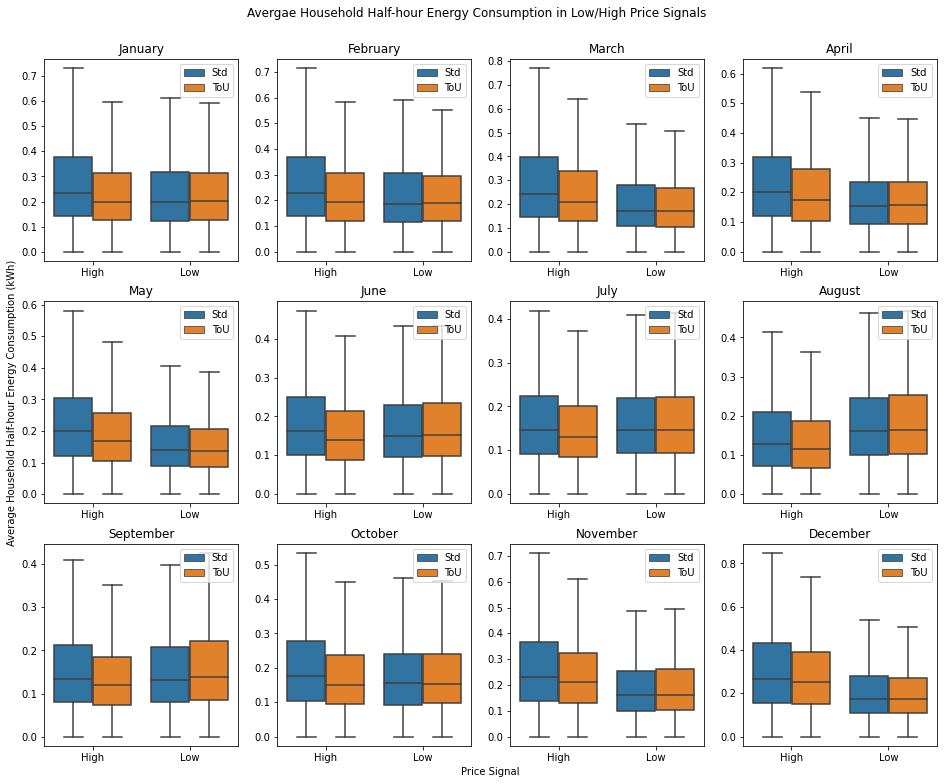

In [23]:
month_df_list = []
months = range(1,13)
for month in months:
    month_df_list.append(filter_df(join_df, month))
plot_graph(month_df_list)